In [ ]:
#install dulu library librarynya (kalau udah ada bisa lewat)
!pip install cartopy
!pip install matplotlib
!pip install xarray
!pip install cmaps

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import cmaps
import numpy as np
import xarray as xr

In [2]:
#download dataset yg akan digunakan (ini contoh aja)
!wget https://github.com/ridhoain/meteorologi101/raw/main/hujan.nc
!wget https://github.com/ridhoain/meteorologi101/raw/main/moisture_data.nc

--2023-03-25 20:48:18--  https://github.com/ridhoain/meteorologi101/raw/main/hujan.nc
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ridhoain/meteorologi101/main/hujan.nc [following]
--2023-03-25 20:48:19--  https://raw.githubusercontent.com/ridhoain/meteorologi101/main/hujan.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161510 (158K) [application/octet-stream]
Saving to: ‘hujan.nc.2’

hujan.nc.2          100%[===================>] 157.72K  --.-KB/s    in 0.1s    

2023-03-25 20:48:20 (1.53 MB/s) - ‘hujan.nc.2’ saved [161510/161510]

--2023-03-25 20:48:20--  https://github.com/ridhoain

In [3]:
#Load datasetnya
data = xr.open_dataset('moisture_data.nc')
data = data.isel(time=0, expver=0) #pilih time yg mau diplot
data

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 81)
Coordinates:
  * longitude  (longitude) float32 100.0 100.2 100.5 100.8 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -9.25 -9.5 -9.75 -10.0
    expver     int32 5
    time       datetime64[ns] 2023-01-01
Data variables:
    msl        (latitude, longitude) float32 ...
    p84.162    (latitude, longitude) float32 ...
    p71.162    (latitude, longitude) float32 ...
    p72.162    (latitude, longitude) float32 ...
    vimd       (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-25 06:17:45 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
# define variabel yg mau diplot
vimc = data['vimd']*(-1)
xflux = data['p71.162']
yflux = data['p72.162']
vimfc = np.sqrt(xflux**2 + yflux**2)
msl = data['msl']*0.01

#define dimensi untuk set plot
lat = data['latitude']
lon = data['longitude']
lon, lat = np.meshgrid(lon, lat)

In [5]:
#load data hujan
hujan = xr.open_dataset('hujan.nc')
hujan

<xarray.Dataset>
Dimensions:                           (lat: 200, lon: 200, latv: 2, lonv: 2)
Coordinates:
  * lat                               (lat) float32 -9.95 -9.85 ... 9.85 9.95
  * lon                               (lon) float32 100.1 100.2 ... 119.9 119.9
Dimensions without coordinates: latv, lonv
Data variables:
    GPM_3IMERGDL_06_precipitationCal  (lat, lon) float32 ...
    lat_bnds                          (lat, latv) float64 ...
    lon_bnds                          (lon, lonv) float64 ...
Attributes: (12/13)
    Conventions:            CF-1.4
    start_time:             2023-01-01T00:00:00Z
    end_time:               2023-01-01T23:59:59Z
    temporal_resolution:    daily
    NCO:                    netCDF Operators version 5.0.6 (Homepage = http:/...
    nco_input_file_number:  1
    ...                     ...
    history:                Sat Mar 25 06:57:54 2023: ncatted -O -o accumulat...
    userstartdate:          2023-01-01T00:00:00Z
    userenddate:            2023-01-01T23:59:59Z
    title:                  Map, Accumulated of Daily accumulated precipitati...
    plot_hint_title:        Map, Accumulated of Daily accumulated precipitati...
    plot_hint_subtitle:     over 2023-01-01, Region 100E, 10S, 120E, 10N

In [6]:
#define
lati = hujan['lat']
longi = hujan['lon']

ch = hujan['GPM_3IMERGDL_06_precipitationCal']

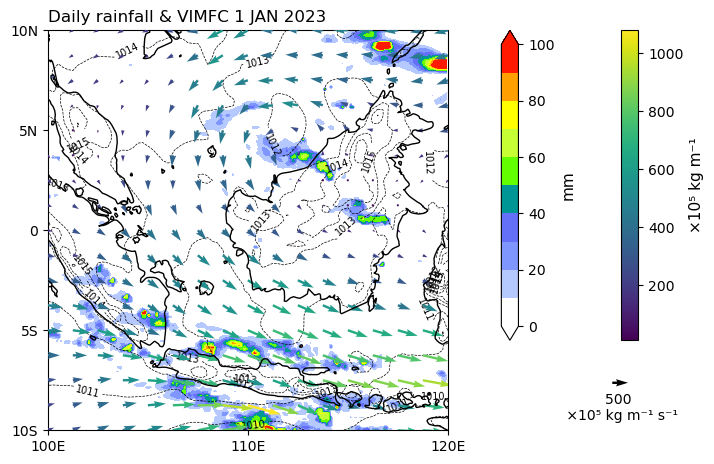

In [7]:
#tentukan batas wilayah yg mau diplot
boundary = [100, 120, 10, -10] #(xmin, xmax, ymax, ymin)
long = [100,110,120] # longitude yg mau dikasih tickmark
lats = [10, 5, 0, -5, -10] # latitude yg mau dikasih tickmark

#formatter untuk atur style penulisan koordinat
lon_formatter = LongitudeFormatter(number_format='.0f', degree_symbol='', dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f', degree_symbol='')

#mulai bikin intruksi gambar
fig = plt.subplots(figsize=(6.,5))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
#set proyeksi
datacrs = ccrs.PlateCarree()
#set formatting
ax.set_extent(boundary, ccrs.PlateCarree())
ax.set_xticks(long, crs=ccrs.PlateCarree())
ax.set_yticks(lats, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
#add garis pantai
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1, edgecolor='black', zorder=10)


#add shading jika ada
#pewarnaan shading
cmag = list(np.arange(0, 110, 10))
colormax = cmaps.precip3_16lev
#colormax.set_under(color='#FFFFFF')
sx = ax.contourf(longi, lati, ch, cmag, cmap=colormax, extend='both', transform=datacrs, zorder=1)

#add kontur mean sea level pressure
c1 = ax.contour(lon, lat, msl, colors='k', linestyles='--', linewidths=0.5, zorder=1)
ax.clabel(c1, fontsize=7, fmt= '%1.0f')

#add vektor vimfc
skip=(slice(None,None,5),slice(None,None,5))
wx = ax.quiver(lon[skip], lat[skip], xflux[skip], yflux[skip], vimfc[skip], #masukkan variabelnya disini
                pivot='tail', width=0.006, transform=datacrs, zorder=5)

#tambahkan judul
ax.set_title('Daily rainfall & VIMFC 1 JAN 2023', loc='left')

#tambahkan colorbar dan legend vektor
plt.subplots_adjust(bottom=0.1, right=1.05, top=0.9, wspace=0.025, hspace=0.14)
cax = plt.axes([1.01, 0.28, 0.0285, 0.62])
ca = plt.colorbar(sx, cax=cax, orientation='vertical', aspect=50)
ca.set_label('mm', fontsize=11)
bax = plt.axes([1.21, 0.28, 0.0285, 0.62])
cb = plt.colorbar(wx, cax=bax, orientation='vertical', aspect=50)
cb.set_label('×10⁵ kg m⁻¹', fontsize=11)
ax.quiverkey(wx, 1.208, 0.195, 500, '500 \n ×10⁵ kg m⁻¹ s⁻¹', labelpos='S', zorder=24,
                   coordinates='figure')


#plt.tight_layout()
#save gambar
#plt.savefig('Figure_VIMFC.pdf', dpi=500, bbox_inches='tight')
plt.show()